# Voice Data Analysis

In this project we use several machine learning classification methods on voice data. The file voice.csv contains (processed) measurement data about voices of males and females. We try to predict the gender (label) using other fields (features) of the data. The main goal is to try and test different kinds of machine learning methods and see how they perform in this simple binary task.

The data set can be found in Kaggle: https://www.kaggle.com/datasets/primaryobjects/voicegender. According to the website: "The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz-" 


## Data understanding

We start by investigating the contents of the data. We see that the dataset is of decent size and contains 21 features which is quite a lot. We will drop many of these features before we apply any machine learning methods on the data.

In [4341]:
import pandas as pd

df = pd.read_csv("data/voice.csv")

print("Number of columns: ", len(df.columns))
print("Number of rows: ", len(df))
df.head(10)


Number of columns:  21
Number of rows:  3168


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,male
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,...,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,male
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,...,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,male
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,...,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,male


The columns contain technical information which does not tell us much yet. We will return to the contents of the columns shortly. 

The next two infos show the names of all columns/features, data types of the features and the amount of null values. We see that the data is clean, i.e. numerical features have type float and the data contains no missing values.

In [4343]:
df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [4344]:
print("The amount of missing values or NaN values for each column: \n ")
print(df.isnull().sum().to_string())

The amount of missing values or NaN values for each column: 
 
meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0


We check whether there are duplicate rows in the data. Indeed, there are two duplicate rows and we drop them later after we have removed the outliers.

In [4346]:
duplicates = df.duplicated().sum()
print(f"Amount of duplicate rows: {duplicates}")

Amount of duplicate rows: 2


The names of the columns in the dataset do not tell much. We have taken the following explanations from the Kaggle website https://www.kaggle.com/datasets/primaryobjects/voicegender. The features are quite technical and are related to the (processed) acoustic properties of voice and speech:

- **meanfreq**: mean frequency (in kHz)
- **sd**: standard deviation of frequency
- **median**: median frequency (in kHz)
- **Q25**: first quantile (in kHz)
- **Q75**: third quantile (in kHz)
- **IQR**: interquantile range (in kHz)
- **skew**: skewness (see note in specprop description)
- **kurt**: kurtosis (see note in specprop description)
- **sp.ent**: spectral entropy
- **sfm**: spectral flatness
- **mode**: mode frequency
- **centroid**: frequency centroid (see specprop)
- **meanfun**: average of fundamental frequency measured across acoustic signal
- **minfun**: minimum fundamental frequency measured across acoustic signal
- **maxfun**: maximum fundamental frequency measured across acoustic signal
- **meandom**: average of dominant frequency measured across acoustic signal
- **mindom**: minimum of dominant frequency measured across acoustic signal
- **maxdom**: maximum of dominant frequency measured across acoustic signal
- **dfrange**: range of dominant frequency measured across acoustic signal
- **modindx**: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
- **label**: male or female, our target feature

As we have noted earlier, the voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz.


Let's print some basic statistics of the numerical features of the data and the amount of unique values for each column. We see that most of the values are of very small size (since their unit is kHz).

In [4349]:
df.describe().apply(lambda s: s.apply('{0:.1f}'.format))

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.0,3168.0,3168.0,3168.0,3168.0,3168.0,3168.0,3168.0,3168.0,3168.0,3168.0,3168.0,3168.0,3168.0,3168.0,3168.0,3168.0,3168.0,3168.0,3168.0
mean,0.2,0.1,0.2,0.1,0.2,0.1,3.1,36.6,0.9,0.4,0.2,0.2,0.1,0.0,0.3,0.8,0.1,5.0,5.0,0.2
std,0.0,0.0,0.0,0.0,0.0,0.0,4.2,134.9,0.0,0.2,0.1,0.0,0.0,0.0,0.0,0.5,0.1,3.5,3.5,0.1
min,0.0,0.0,0.0,0.0,0.0,0.0,0.1,2.1,0.7,0.0,0.0,0.0,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0
25%,0.2,0.0,0.2,0.1,0.2,0.0,1.6,5.7,0.9,0.3,0.1,0.2,0.1,0.0,0.3,0.4,0.0,2.1,2.0,0.1
50%,0.2,0.1,0.2,0.1,0.2,0.1,2.2,8.3,0.9,0.4,0.2,0.2,0.1,0.0,0.3,0.8,0.0,5.0,4.9,0.1
75%,0.2,0.1,0.2,0.2,0.2,0.1,2.9,13.6,0.9,0.5,0.2,0.2,0.2,0.0,0.3,1.2,0.1,7.0,7.0,0.2
max,0.3,0.1,0.3,0.2,0.3,0.3,34.7,1309.6,1.0,0.8,0.3,0.3,0.2,0.2,0.3,3.0,0.5,21.9,21.8,0.9


In [4350]:
print("The amount of unique values of columns: \n")
df.nunique()

The amount of unique values of columns: 



meanfreq    3166
sd          3166
median      3077
Q25         3103
Q75         3034
IQR         3073
skew        3166
kurt        3166
sp.ent      3166
sfm         3166
mode        2825
centroid    3166
meanfun     3166
minfun       913
maxfun       123
meandom     2999
mindom        77
maxdom      1054
dfrange     1091
modindx     3079
label          2
dtype: int64

## Visualization

We will visualize the data in order to see what kind of distributions some of the features have and how to find outliers from the data (how the male and female voices have spread out). First we use histograms and bar charts and then scatter plots.

### Visualization of distributions

Next we do some visualization of the distributions of the features. We only visualize the most important features of the data. We both plot the distributions for the whole data and do some groupings based on the gender label.

The most important features were obtained by using the whole dataset in the training of a decision tree (and random forest) and then choosing those features which had the biggest contribution in the classification task done by the decision tree (and random forest). The most important features were meanfun, IQR, sfm and minfun. This analysis of the whole data is not documented here but it was the starting point of this project. 

However, after studying the data in more detail we ended up with dropping the feature minfun from our list of features used in the machine learning since dropping it made the accuracies better. This can also be justified by looking at the histograms and scatter plots below, i.e. in the feature minfun the male and female voices are more mixed than in the features meanfun, IQR and sfm. This can cause misidentifications in the classification task.

Indeed, let's start by plotting the histograms for the whole dataset where men and women are treated as one group.

Largest value:  0.24
Lowest value:  0.06
Median value:  0.14
Average value:  0.14
Standard deviation:  0.03


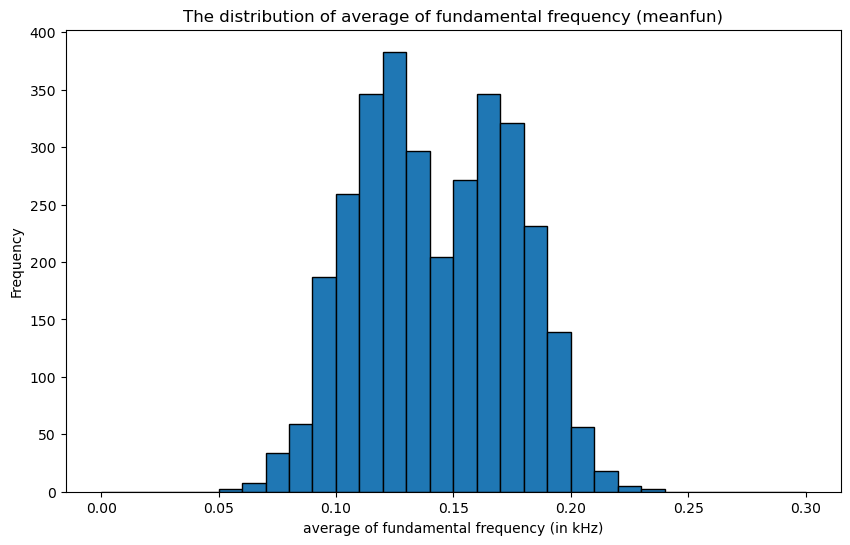

In [4356]:
import matplotlib.pyplot as plt

df["meanfun"].plot(kind = "hist", bins = 30, range= [0, 0.3], figsize = (10, 6), edgecolor = "black")
plt.title("The distribution of average of fundamental frequency (meanfun)")
plt.xlabel("average of fundamental frequency (in kHz)")

print("Largest value: ", round(df["meanfun"].max(), 2))
print("Lowest value: ", round(df["meanfun"].min(), 2))
print("Median value: ", round(df["meanfun"].median(), 2))
print("Average value: ", round(df["meanfun"].mean(), 2))
print("Standard deviation: ", round(df["meanfun"].std(), 2))

Largest value:  0.25
Lowest value:  0.01
Median value:  0.09
Average value:  0.08
Standard deviation:  0.04


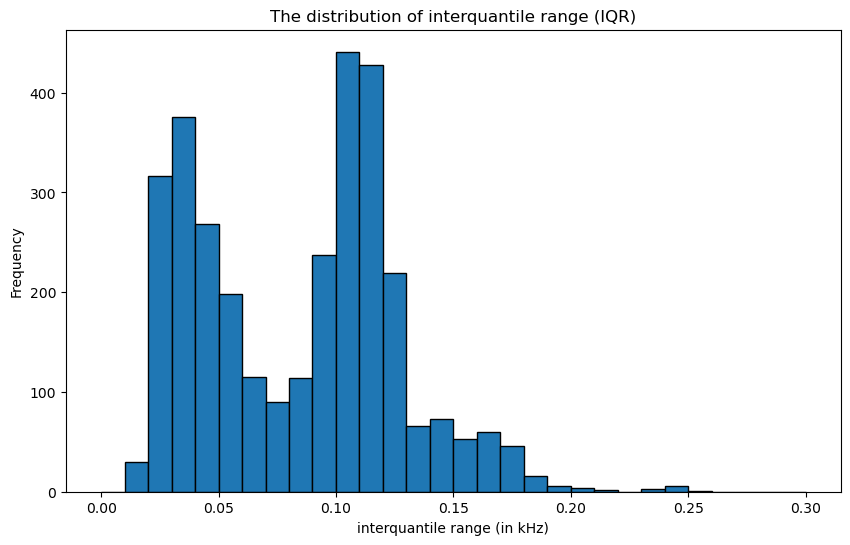

In [4357]:
df["IQR"].plot(kind = "hist", bins = 30, range= [0, 0.3], figsize = (10, 6), edgecolor = "black")
plt.title("The distribution of interquantile range (IQR)")
plt.xlabel("interquantile range (in kHz)")

print("Largest value: ", round(df["IQR"].max(), 2))
print("Lowest value: ", round(df["IQR"].min(), 2))
print("Median value: ", round(df["IQR"].median(), 2))
print("Average value: ", round(df["IQR"].mean(), 2))
print("Standard deviation: ", round(df["IQR"].std(), 2))

Largest value:  0.84
Lowest value:  0.04
Median value:  0.4
Average value:  0.41
Standard deviation:  0.18


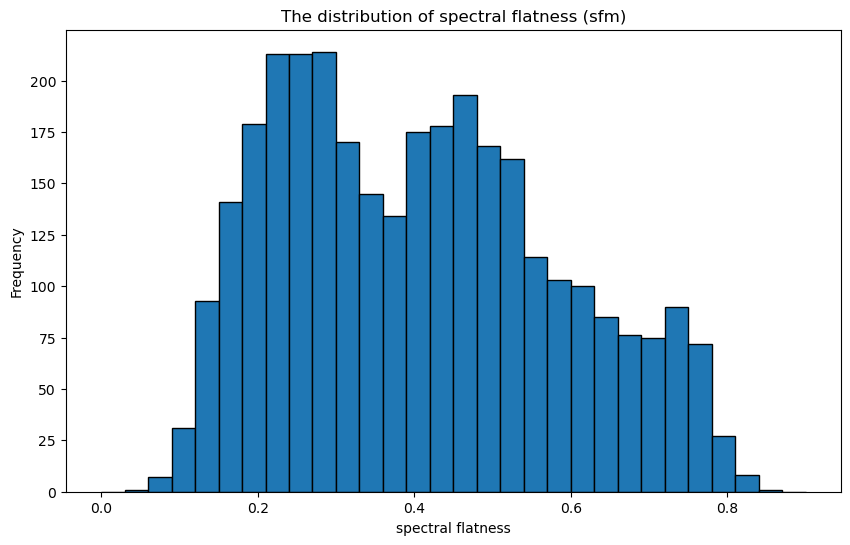

In [4358]:
df["sfm"].plot(kind = "hist", bins = 30, range= [0, 0.9], figsize = (10, 6), edgecolor = "black")
plt.title("The distribution of spectral flatness (sfm)")
plt.xlabel("spectral flatness")

print("Largest value: ", round(df["sfm"].max(), 2))
print("Lowest value: ", round(df["sfm"].min(), 2))
print("Median value: ", round(df["sfm"].median(), 2))
print("Average value: ", round(df["sfm"].mean(), 2))
print("Standard deviation: ", round(df["sfm"].std(), 2))

Largest value:  0.2
Lowest value:  0.01
Median value:  0.05
Average value:  0.04
Standard deviation:  0.02


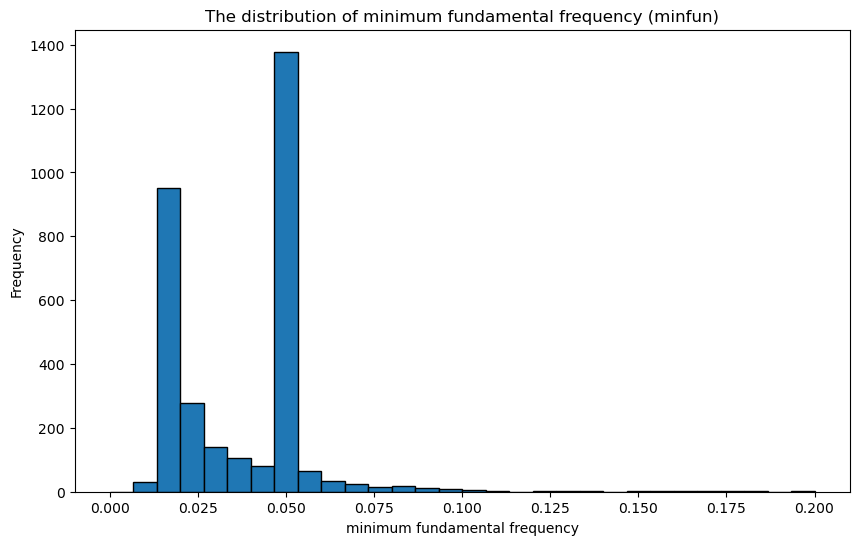

In [4359]:
df["minfun"].plot(kind = "hist", bins = 30, range= [0, 0.2], figsize = (10, 6), edgecolor = "black")
plt.title("The distribution of minimum fundamental frequency (minfun)")
plt.xlabel("minimum fundamental frequency")

print("Largest value: ", round(df["minfun"].max(), 2))
print("Lowest value: ", round(df["minfun"].min(), 2))
print("Median value: ", round(df["minfun"].median(), 2))
print("Average value: ", round(df["minfun"].mean(), 2))
print("Standard deviation: ", round(df["minfun"].std(), 2))

We see that the data consists of equal amount of men and women

Amount of males: 1584
Amount of females: 1584
Total number: 3168


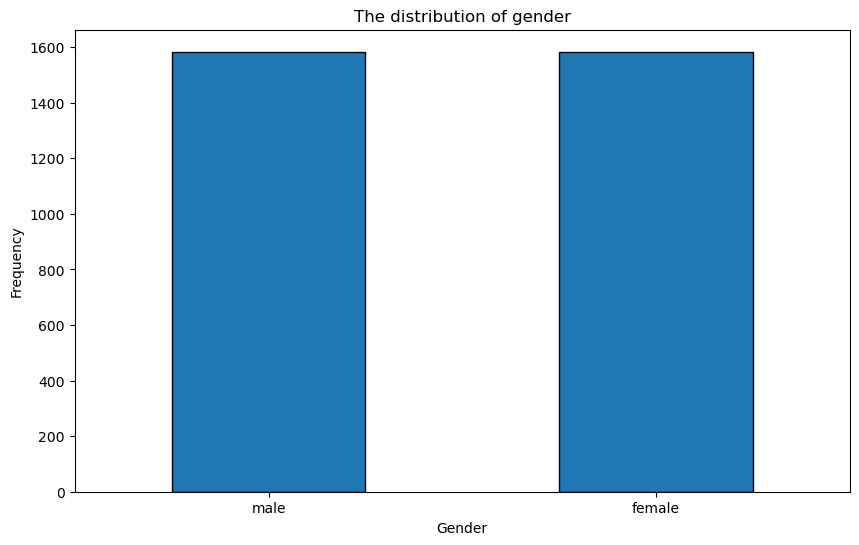

In [4361]:
ax1 = df["label"].value_counts().plot(kind='bar', figsize = (10, 6), edgecolor = "black")
ax1.tick_params(axis='x', rotation=0)
plt.ylabel("Frequency")
plt.xlabel("Gender")
plt.title("The distribution of gender")
males = len(df[df["label"]== "male"])
females = len(df[df["label"]== "female"])
print(f"Amount of males: {males}")
print(f"Amount of females: {females}")
print(f"Total number: {len(df)}")

Next we draw the same histograms by grouping the gender into males and females. From the histograms below we see that the voices of men and women are clearly separated in the features meanfun and IQR, but are more mixed in the features sfm and minfun. 

We see that the distribution of female voices is more spread out in the features IQR and sfm. The distributions of male voices look more centralized. The feature minfun is heavily focused and overlapping in genders which again tells that this feature might not be useful in the classification task done by machine learning models.

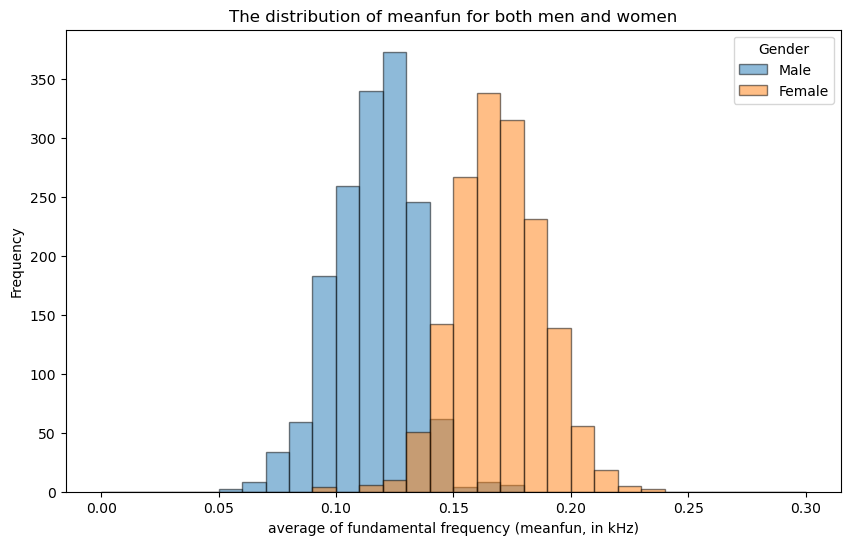

In [4363]:
men = df[df["label"] == "male"]
women = df[df["label"] == "female"]

men["meanfun"].plot(kind = "hist", bins = 30, range= [0, 0.3], figsize = (10, 6), edgecolor = "black", alpha = 0.5)
women["meanfun"].plot(kind = "hist", bins = 30, range= [0, 0.3], figsize = (10, 6), edgecolor = "black", alpha = 0.5)
plt.title("The distribution of meanfun for both men and women")
plt.xlabel("average of fundamental frequency (meanfun, in kHz)")
plt.legend(["Male", "Female"], title = "Gender")

plt.show()

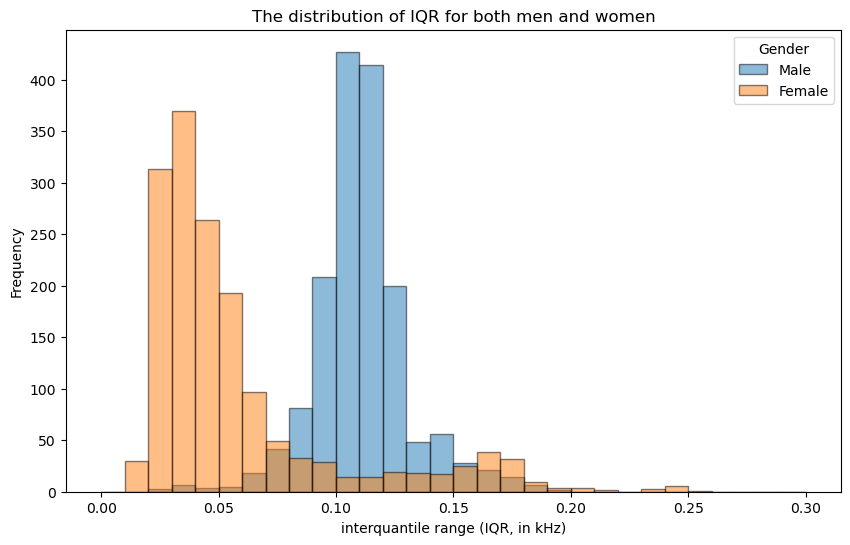

In [4364]:
men["IQR"].plot(kind = "hist", bins = 30, range= [0, 0.3], figsize = (10, 6), edgecolor = "black", alpha = 0.5)
women["IQR"].plot(kind = "hist", bins = 30, range= [0, 0.3], figsize = (10, 6), edgecolor = "black", alpha = 0.5)
plt.title("The distribution of IQR for both men and women")
plt.xlabel("interquantile range (IQR, in kHz)")
plt.legend(["Male", "Female"], title = "Gender")

plt.show()

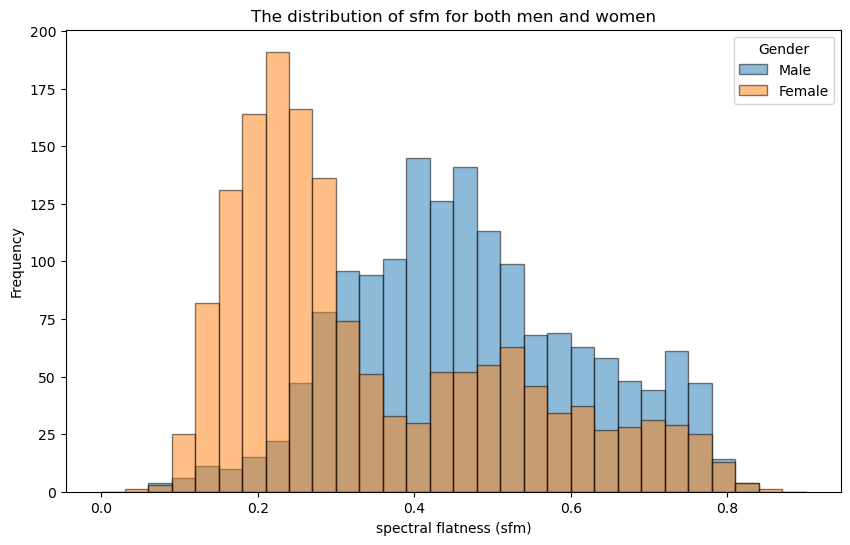

In [4365]:
men["sfm"].plot(kind = "hist", bins = 30, range= [0, 0.9], figsize = (10, 6), edgecolor = "black", alpha = 0.5)
women["sfm"].plot(kind = "hist", bins = 30, range= [0, 0.9], figsize = (10, 6), edgecolor = "black", alpha = 0.5)
plt.title("The distribution of sfm for both men and women")
plt.xlabel("spectral flatness (sfm)")
plt.legend(["Male", "Female"], title = "Gender")

plt.show()

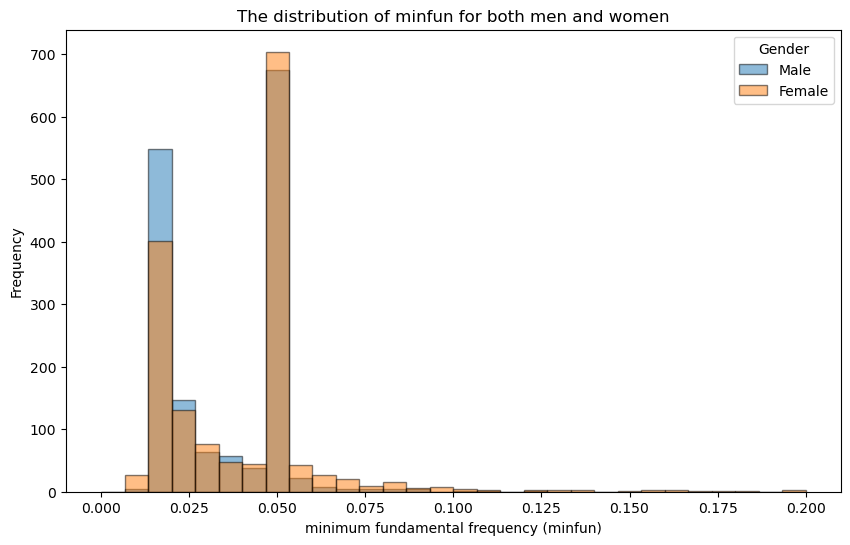

In [4366]:
men["minfun"].plot(kind = "hist", bins = 30, range= [0, 0.2], figsize = (10, 6), edgecolor = "black", alpha = 0.5)
women["minfun"].plot(kind = "hist", bins = 30, range= [0, 0.2], figsize = (10, 6), edgecolor = "black", alpha = 0.5)
plt.title("The distribution of minfun for both men and women")
plt.xlabel("minimum fundamental frequency (minfun)")
plt.legend(["Male", "Female"], title = "Gender")

plt.show()

### Visualization of the clusters of male and female voices

Then we draw scatter plots using the four features meanfun, IQR, sfm and minfun. We see that female and male voices can clearly be distinguished by eye from some of the scatter plots (scatter plots including meanfun, IQR and sfm). However, there are visible overlaps in the female and male clusters in the plots including the feature minfun. These observations can also be seen from the histogram plots we did above.

Like in the histogram plots, we see that female voices are more spread out than male voices (which are more concentrated).

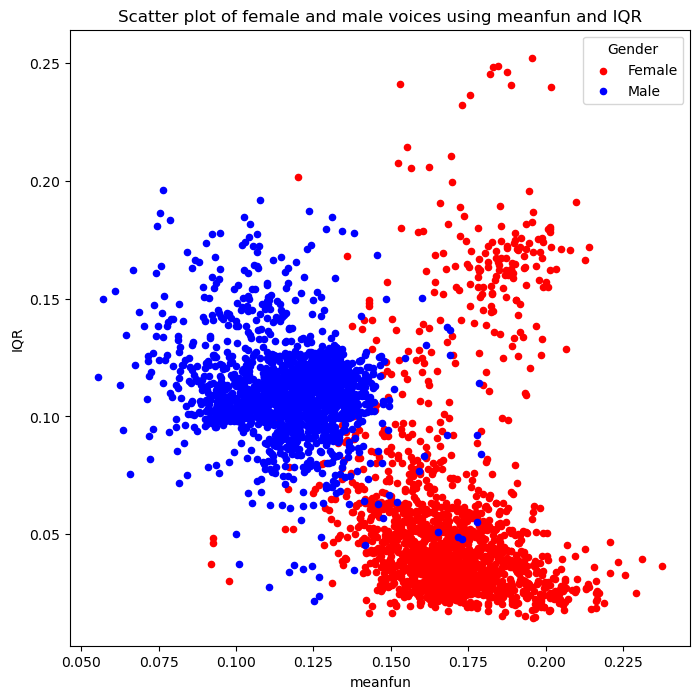

In [4369]:
males = df[df["label"] == "male"]
females = df[df["label"] == "female"]

females_data = females[["meanfun", "IQR"]]
males_data = males[["meanfun", "IQR"]]

ax1 = females_data.plot(kind = "scatter", x = "meanfun", y = "IQR", figsize = (8, 8), color = "red",
                        title = "Scatter plot of female and male voices using ""meanfun"" and ""IQR""")
ax2 = males_data.plot(kind = "scatter", x = "meanfun", y = "IQR", color = "blue", ax = ax1)
plt.legend(["Female", "Male"], title = "Gender")




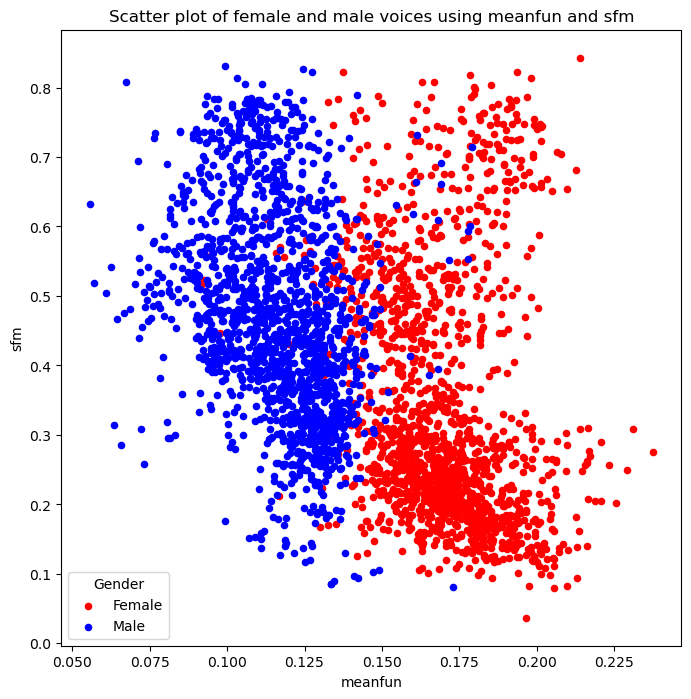

In [4370]:
females_data2 = females[["meanfun", "sfm"]]
males_data2 = males[["meanfun", "sfm"]]

ax1 = females_data2.plot(kind = "scatter", x = "meanfun", y = "sfm", figsize = (8, 8), color = "red",
                        title = "Scatter plot of female and male voices using ""meanfun"" and ""sfm""")
ax2 = males_data2.plot(kind = "scatter", x = "meanfun", y = "sfm", color = "blue", ax = ax1)
plt.legend(["Female", "Male"], title = "Gender")

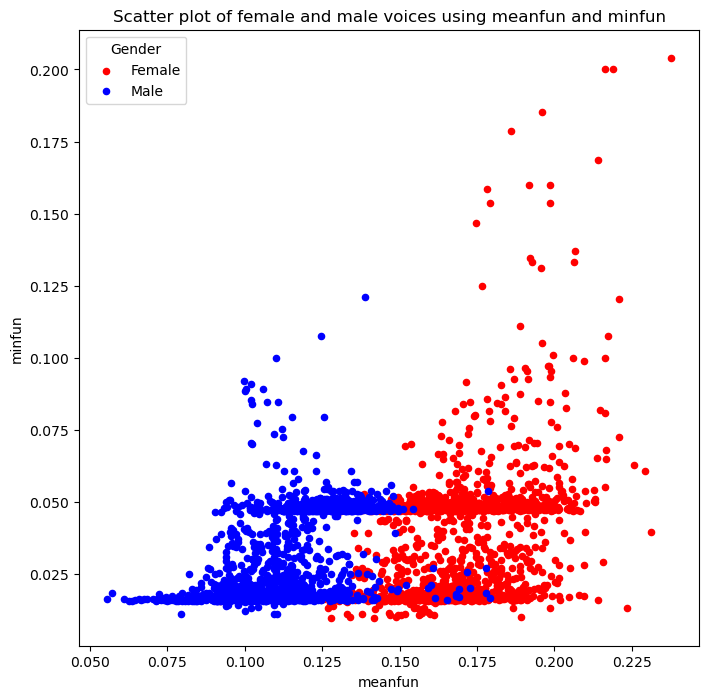

In [4371]:
females_data2 = females[["meanfun", "minfun"]]
males_data2 = males[["meanfun", "minfun"]]

ax1 = females_data2.plot(kind = "scatter", x = "meanfun", y = "minfun", figsize = (8, 8), color = "red",
                        title = "Scatter plot of female and male voices using ""meanfun"" and ""minfun""")
ax2 = males_data2.plot(kind = "scatter", x = "meanfun", y = "minfun", color = "blue", ax = ax1)
plt.legend(["Female", "Male"], title = "Gender")


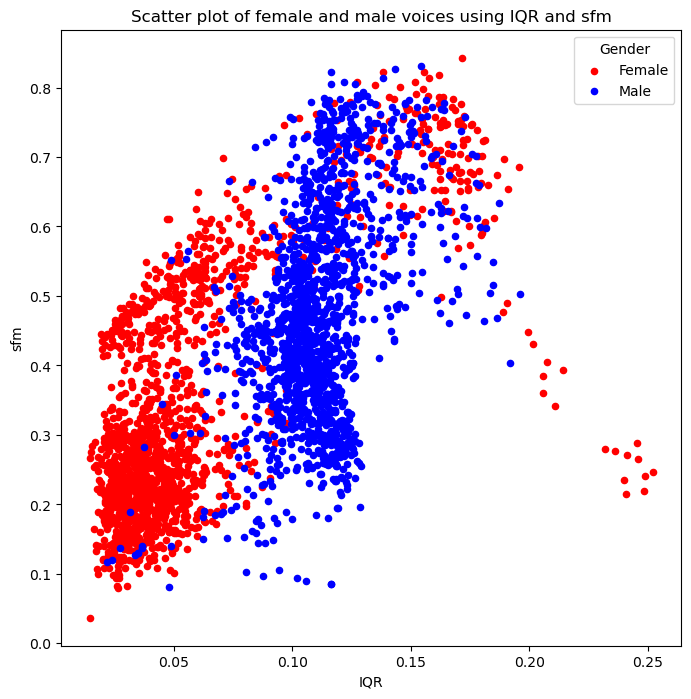

In [4372]:
females_data2 = females[["IQR", "sfm"]]
males_data2 = males[["IQR", "sfm"]]

ax1 = females_data2.plot(kind = "scatter", x = "IQR", y = "sfm", figsize = (8, 8), color = "red",
                        title = "Scatter plot of female and male voices using ""IQR"" and ""sfm""")
ax2 = males_data2.plot(kind = "scatter", x = "IQR", y = "sfm", color = "blue", ax = ax1)
plt.legend(["Female", "Male"], title = "Gender")

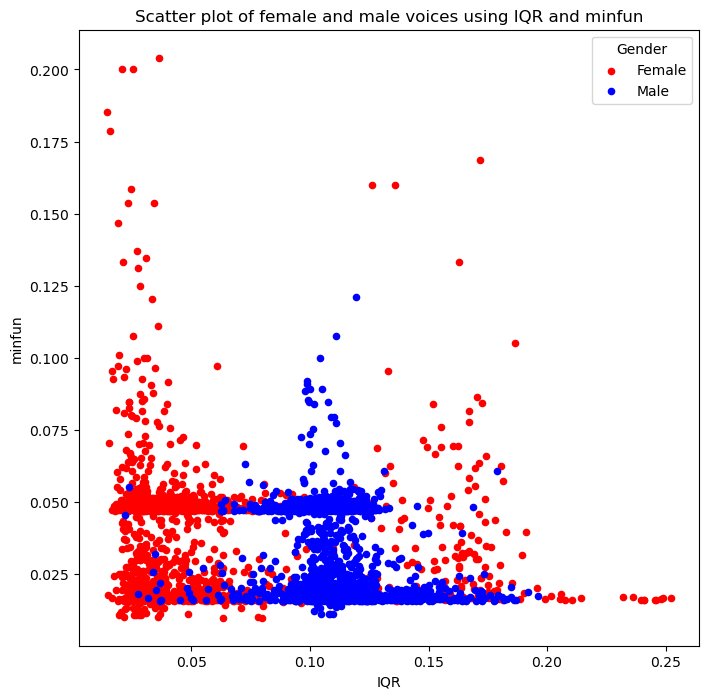

In [4373]:
females_data2 = females[["IQR", "minfun"]]
males_data2 = males[["IQR", "minfun"]]

ax1 = females_data2.plot(kind = "scatter", x = "IQR", y = "minfun", figsize = (8, 8), color = "red",
                        title = "Scatter plot of female and male voices using ""IQR"" and ""minfun""")
ax2 = males_data2.plot(kind = "scatter", x = "IQR", y = "minfun", color = "blue", ax = ax1)
plt.legend(["Female", "Male"], title = "Gender")

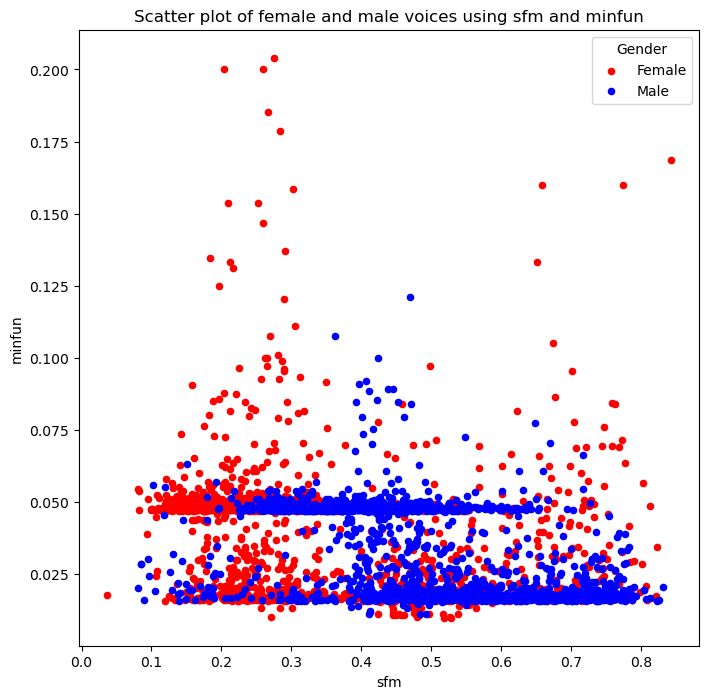

In [4374]:
females_data2 = females[["sfm", "minfun"]]
males_data2 = males[["sfm", "minfun"]]

ax1 = females_data2.plot(kind = "scatter", x = "sfm", y = "minfun", figsize = (8, 8), color = "red",
                        title = "Scatter plot of female and male voices using ""sfm"" and ""minfun""")
ax2 = males_data2.plot(kind = "scatter", x = "sfm", y = "minfun", color = "blue", ax = ax1)
plt.legend(["Female", "Male"], title = "Gender")

## Outlier detection

As discussed above, we will only use the input features meanfun, IQR and sfm to determine the output feature label or gender. We initially had the feature minfun in our study but we saw that it just mixes the voice samples of men and women and therefore leads to more wrong predictions. 

We detect the outliers separately for men and women. This is because the distributions of the features have different shapes for men and women as we saw above from the histograms. Also from the scatter plots we saw that the female voices are more spread out and possibly contain more outliers than male voices.

The input feature meanfun resembles the normal distribution for both genders. Hence we can use the "mean $\pm$ 2.7 $\cdot$ standard deviation" -rule for the normal distribution. This is roughly the same as applying the interquartile outlier rule as explained below. 

For the input features IQR and sfm we can use statistical interquartile ranges, i.e. we drop those values which lay below Q1 − 1.5 I.Q.R. or above Q3 + 1.5 I.Q.R. Here I.Q.R. is the statistical interquartile range obtained from the difference Q3-Q1 where Q1 is the lower quartile and Q3 is the upper quartile. 

For men the distributions of IQR and sfm seem normal but it should not make any difference whether we use the interquartile ranges or "mean $\pm$ 2.7 $\cdot$ standard deviation" -rule (they should be the same when the distribution is normal).

We note that we first removed the outliers for the dataset as a whole including both men and women but that lead to a little bit lower accuracy since not all female outliers were dropped (men and women were considered together as one group). We have included the code here if one wants to explore how the models performed under this assumption.

We start by removing outliers from the feature minfun which looks Gaussian for both genders. We see that there are 37 outliers in total in this feature.

In [4378]:
males = df[df["label"] == "male"]
females = df[df["label"] == "female"]

meanfun_mean_males = males["meanfun"].mean()
meanfun_mean_females = females["meanfun"].mean()

meanfun_std_males = males["meanfun"].std()
meanfun_std_females = females["meanfun"].std()

print(f"Rows: {len(pd.concat([males, females]))}")

males = males[(males["meanfun"]>= meanfun_mean_males-
               2.7*meanfun_std_males) & (males["meanfun"] <= meanfun_mean_males + 2.7*meanfun_std_males)]
females = females[(females["meanfun"]>= meanfun_mean_females-
               2.7*meanfun_std_females) & (females["meanfun"] <= meanfun_mean_females + 2.7*meanfun_std_females)]

print(f"Rows after removing outliers from meanfun: {len(pd.concat([males, females]))}")


# This is what we did first before treating the genders as separate groups

# meanfun_mean = df["meanfun"].mean()
# meanfun_std = df["meanfun"].std()

# print(f"Rows: {len(df)}")
# We apply the 95% rule to the feature meanfun which is almost normally distributed
# df = df[(df["meanfun"]>= meanfun_mean-2.7*meanfun_std) & (df["meanfun"] <= meanfun_mean + 2.7*meanfun_std)]
# print(f"Rows after removing outliers from meanfun: {len(df)} \n")

Rows: 3168
Rows after removing outliers from meanfun: 3131


Next we drop outliers from the feature IQR. Now there are a lot of outliers (mainly in women) since over 300 rows are dropped.

In [4380]:
Q1_IQR_males = males["IQR"].quantile(0.25)
Q3_IQR_males = males["IQR"].quantile(0.75)
IQR_IQR_males = Q3_IQR_males - Q1_IQR_males

Q1_IQR_females = females["IQR"].quantile(0.25)
Q3_IQR_females = females["IQR"].quantile(0.75)
IQR_IQR_females = Q3_IQR_females - Q1_IQR_females

print(f"Rows: {len(pd.concat([males, females]))}")

# We apply interquartile ranges for the feature IQR
males = males[(males["IQR"]>= Q1_IQR_males - 
               1.5*IQR_IQR_males) & (males["IQR"]<= Q3_IQR_males + 1.5*IQR_IQR_males)]

females = females[(females["IQR"]>= Q1_IQR_females - 
               1.5*IQR_IQR_females) & (females["IQR"]<= Q3_IQR_females + 1.5*IQR_IQR_females)]



print(f"Rows after removing outliers from IQR: {len(pd.concat([males, females]))}")


# This is what we did first before treating the genders as separate groups

# sfm_mean = df["sfm"].mean()
# sfm_std = df["sfm"].std()

# print(f"Rows: {len(df)}")
# We apply the 95% rule to the feature sfm which is almost normally distributed
# df = df[(df["sfm"]>= sfm_mean-2.7*sfm_std) & (df["sfm"] <= sfm_mean + 2.7*sfm_std)]
# print(f"Rows after removing outliers from sfm: {len(df)} \n")

Rows: 3131
Rows after removing outliers from IQR: 2803


Lastly we remove the outliers from the feature sfm. This time only 13 rows are dropped.

In [4382]:
Q1_sfm_males = males["sfm"].quantile(0.25)
Q3_sfm_males = males["sfm"].quantile(0.75)
IQR_sfm_males = Q3_sfm_males - Q1_sfm_males

Q1_sfm_females = females["sfm"].quantile(0.25)
Q3_sfm_females = females["sfm"].quantile(0.75)
IQR_sfm_females = Q3_sfm_females - Q1_sfm_females


print(f"Rows: {len(pd.concat([males, females]))}")

# We apply interquartile ranges for the feature sfm
males = males[(males["sfm"]>= Q1_sfm_males - 
               1.5*IQR_sfm_males) & (males["sfm"]<= Q3_sfm_males + 1.5*IQR_sfm_males)]

females = females[(females["sfm"]>= Q1_sfm_females - 
               1.5*IQR_sfm_females) & (females["sfm"]<= Q3_sfm_females + 1.5*IQR_sfm_females)]



print(f"Rows after removing outliers from IQR: {len(pd.concat([males, females]))} \n")


Rows: 2803
Rows after removing outliers from IQR: 2790 



Overall, we see that 378 rows were dropped from the data which is roughly 12% of the whole dataset (a reasonable amount). There indeed were more outliers in the female data than in male data, but in the end the amount of males and females is roughly the same in the processed dataset. 

In [4384]:
print(f"Amount of males: {len(males)}")
print(f"Amount of females: {len(females)} \n")

df = pd.concat([males, females])
df

Amount of males: 1434
Amount of females: 1356 



,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3154,0.200097,0.045533,0.203796,0.176581,0.232133,0.055552,1.160197,3.733815,0.919607,0.357144,...,0.200097,0.168531,0.063241,0.262295,0.718750,0.148438,7.000000,6.851562,0.092208,female
3155,0.178573,0.046679,0.164388,0.149309,0.204601,0.055293,3.066668,15.684088,0.891448,0.321169,...,0.178573,0.155380,0.025478,0.253968,0.637921,0.148438,6.148438,6.000000,0.101291,female
3156,0.201806,0.036057,0.201622,0.178165,0.227872,0.049707,1.585353,4.945634,0.884731,0.227903,...,0.201806,0.191704,0.032720,0.275862,0.593750,0.007812,5.921875,5.914062,0.124383,female
3157,0.203627,0.041529,0.204104,0.175661,0.239122,0.063461,1.462972,4.790370,0.903458,0.246953,...,0.203627,0.146783,0.020566,0.262295,0.875558,0.171875,6.898438,6.726562,0.145534,female


In [4385]:
# This is what we did first before treating the genders as separate groups

# Q1_IQR = df["IQR"].quantile(0.25)
# Q3_IQR = df["IQR"].quantile(0.75)
# IQR_IQR = Q3_IQR - Q1_IQR

# print(f"Rows: {len(df)}")

# We apply interquartile ranges for the feature IQR
# df = df[(df["IQR"]>= Q1_IQR - 1.5*IQR_IQR) & (df["IQR"]<= Q3_IQR + 1.5*IQR_IQR)]
# print(f"Rows after removing outliers from IQR: {len(df)} \n")

In [4386]:
# This is what we did first before treating the genders as separate groups

# Q1_minfun = df["minfun"].quantile(0.25)
# Q3_minfun = df["minfun"].quantile(0.75)
# IQR_minfun = Q3_minfun - Q1_minfun

# print(f"Rows: {len(df)}")

# We apply interquartile ranges for the feature minfun
# df = df[(df["minfun"]>= Q1_minfun - 1.5*IQR_minfun) & (df["minfun"]<= Q3_minfun + 1.5*IQR_minfun)]
# print(f"Rows after removing outliers from minfun: {len(df)} \n")

In [4387]:
# We see that only 50 rows were dropped so there were only a small amount of outliers in the data. Let's then check whether the duplicate rows still exist in the data. The duplicate rows exist and hence we drop them.

Finally, let's then drop the possible duplicate rows from the data.

In [4389]:
duplicates = df.duplicated().sum()
print(f"Amount of duplicate rows: {duplicates}")

Amount of duplicate rows: 2


In [4390]:
# We drop the duplicate rows
df.drop_duplicates(inplace = True)
df.reset_index(drop=True, inplace = True)
duplicates = df.duplicated().sum()
print(f"Amount of duplicate rows: {duplicates}")
print(f"Rows: {len(df)}")

Amount of duplicate rows: 0
Rows: 2788


## Modeling

Next we will apply several different machine learning algorithms on the processed data to predict the gender label. First we have to convert the gender (feature label) into a numerical variable before applying machine learning methods.

In [4393]:
from sklearn.preprocessing import LabelEncoder

gender_LE = LabelEncoder()
df["label"] = gender_LE.fit_transform(df["label"])
df.rename(columns={"label": "gender"}, inplace = True)
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,gender
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
2,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
3,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1
4,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,1


Our target variable will be the gender and input features will be meanfun, IQR, sfm and minfun.

In [4395]:
y = df["gender"]

X = df[["meanfun", "IQR", "sfm"]]
columns = X.columns
X

# The accuracies mentioned below are for the models where we did not drop outliers separately for men and women,
# instead we dropped outliers from the whole dataset treating men and women as one group.
# X = df[["meanfun", "IQR", "sfm", "minfun"]] # accuracy of the models 95% - 98 %
# X = df[["meanfun", "IQR"]] # accuracy of the models about 96 %
# X = df[["meanfun"]] # accuracy of the models in the range 92% - 96 %
# X = df.drop(["gender"], axis = 1) # accuracy of the models 95 - 98 %, naive bayes only 86%!
# X = df[["meanfun", "IQR", "sfm"]] # accuracies of the models 95 - 98 %, best individual accuracies!

,meanfun,IQR,sfm
0,0.084279,0.075122,0.491918
1,0.098706,0.123207,0.478905
2,0.088965,0.111374,0.727232
3,0.106398,0.127325,0.783568
4,0.110132,0.141634,0.738307
...,...,...,...
2783,0.168531,0.055552,0.357144
2784,0.155380,0.055293,0.321169
2785,0.191704,0.049707,0.227903
2786,0.146783,0.063461,0.246953


We split the data first into train, validation and test data. Train data is used to train the models, validation data is used to tune the hyperparameters and test data is used to test the accuracy of the models. 20 % of the whole dataset is used for testing and 20 % of the train data is used for validation/tuning of hyperparameters.

In [4397]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

All the features we use are between 0 and 1 so minmax-scaling is not necessary. However, we apply the StandardScaler for the input features to obtain a better accuracy in the validation and test data. 

In [4399]:
from sklearn.preprocessing import StandardScaler

scaler_stand = StandardScaler()
scaler_stand.fit(X_train)
X_train = scaler_stand.transform(X_train)
X_valid = scaler_stand.transform(X_valid)
X_test = scaler_stand.transform(X_test)


### Building models 

We will use the following seven machine learning methods for classification:

1. Decision Tree 
2. Support Vector Machine   
3. k-Nearest Neighbors  
4. Gaussian Naive Bayes 
5. Random Forest
6. Logistic Regression (which is a classifier despite its name)
7. Neural Network.

For all methods we calculate the accuracy, confusion matrix and AUC value and print the classification report and ROC curve of the classification results. In the end we shortly compare the performances of the models.


### 1. Decision Tree

First we look at the decision tree classifier. We note that we chose the four input features meanfun, IQR, sfm and minfun (from which we finally dropped minfun) based on the feature importances of the decision tree (and random forest) when applied to the whole dataset. However, this is not documented in this project.

We see that in the case of the decision tree the most important feature is IQR. We obtain the accuracy 98.6% in test data and the AUC value in test data is 0.99.

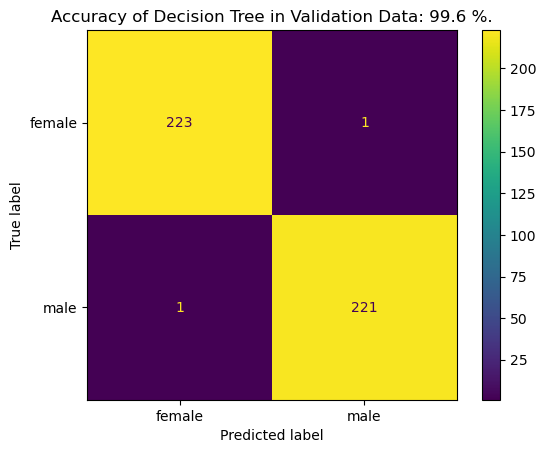

,Feature importance
IQR,90.5 %
meanfun,8.2 %
sfm,1.3 %


In [4403]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


# By trying we find out that best accuracy 98.6% in test data is obtained already when the depth is 7
model_tree = DecisionTreeClassifier(max_depth = 7, random_state=42)  
model_tree.fit(X_train, y_train)

acc_tree_valid = model_tree.score(X_valid, y_valid)

y_pred_tree_valid = model_tree.predict(X_valid)
cm_tree_valid = confusion_matrix(y_valid, y_pred_tree_valid)
ConfusionMatrixDisplay(confusion_matrix=cm_tree_valid, display_labels = gender_LE.inverse_transform([0, 1])).plot()
plt.title(f'Accuracy of Decision Tree in Validation Data: {round(acc_tree_valid*100, 1)} %.')
plt.show()


# Let's print the feature importances
importances = model_tree.feature_importances_
feature_importances = pd.DataFrame(columns = ["Feature importance"], index = columns) 
for i in range(len(columns)):
    feature_importances.loc[columns[i], "Feature importance"] = round(importances[i]*100, 1)
feature_importances = feature_importances.sort_values(by="Feature importance", ascending=False)

feature_importances["Feature importance"] = feature_importances["Feature importance"].apply(lambda x: f"{x} %")

feature_importances


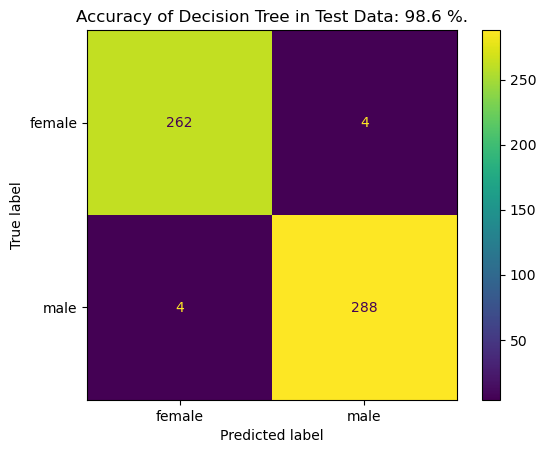

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       266
           1       0.99      0.99      0.99       292

    accuracy                           0.99       558
   macro avg       0.99      0.99      0.99       558
weighted avg       0.99      0.99      0.99       558



In [4404]:
acc_tree_test = model_tree.score(X_test, y_test)

y_pred_tree_test = model_tree.predict(X_test)
cm_tree_test = confusion_matrix(y_test, y_pred_tree_test)
ConfusionMatrixDisplay(confusion_matrix=cm_tree_test, display_labels = gender_LE.inverse_transform([0, 1])).plot()
plt.title(f'Accuracy of Decision Tree in Test Data: {round(acc_tree_test*100, 1)} %.')
plt.show()

cr_tree = classification_report(y_test, y_pred_tree_test)
print(cr_tree)

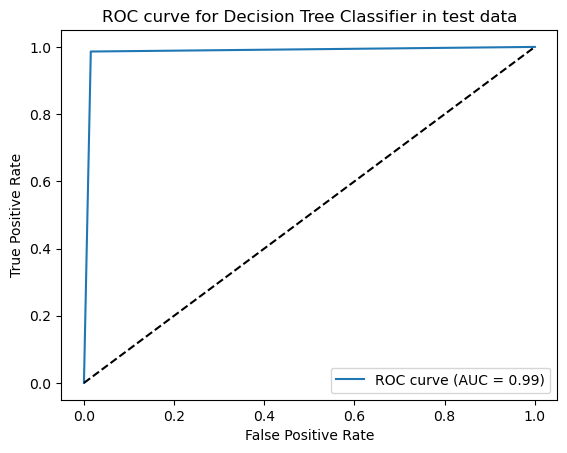

In [4405]:
y_pred_prob_tree = model_tree.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_tree)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title("ROC curve for Decision Tree Classifier in test data")
plt.show()

### 2. Support Vector Machine

Then we look at the Support Vector Machine classifier. We obtain the accuracy 99.1% both in validation data and test data, and the AUC value in test data is 1.00.

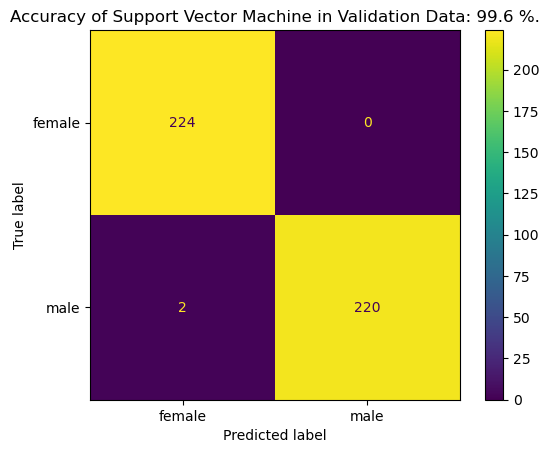

In [4408]:
from sklearn.svm import SVC

model_SVC = SVC(max_iter=1000, random_state=42, probability = True)
model_SVC.fit(X_train, y_train)

acc_SVC_valid = model_SVC.score(X_valid, y_valid)

y_pred_SVC_valid = model_SVC.predict(X_valid)
cm_SVC_valid = confusion_matrix(y_valid, y_pred_SVC_valid)
ConfusionMatrixDisplay(confusion_matrix=cm_SVC_valid, display_labels = gender_LE.inverse_transform([0, 1])).plot()
plt.title(f'Accuracy of Support Vector Machine in Validation Data: {round(acc_SVC_valid*100, 1)} %.')
plt.show()


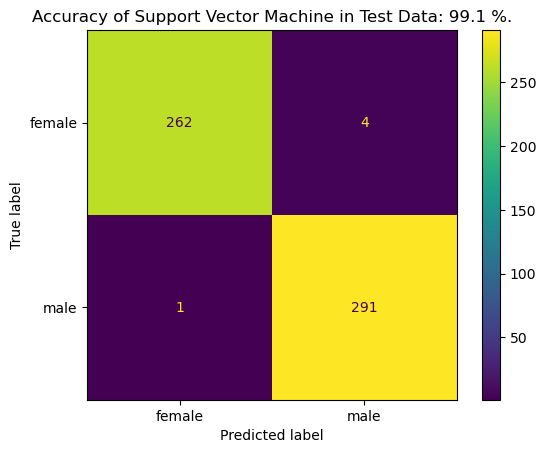

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       266
           1       0.99      1.00      0.99       292

    accuracy                           0.99       558
   macro avg       0.99      0.99      0.99       558
weighted avg       0.99      0.99      0.99       558



In [4409]:
acc_SVC_test = model_SVC.score(X_test, y_test)

y_pred_SVC_test = model_SVC.predict(X_test)
cm_SVC_test = confusion_matrix(y_test, y_pred_SVC_test)
ConfusionMatrixDisplay(confusion_matrix=cm_SVC_test, display_labels = gender_LE.inverse_transform([0, 1])).plot()
plt.title(f'Accuracy of Support Vector Machine in Test Data: {round(acc_SVC_test*100, 1)} %.')
plt.show()

cr_SVC = classification_report(y_test, y_pred_SVC_test)
print(cr_SVC)

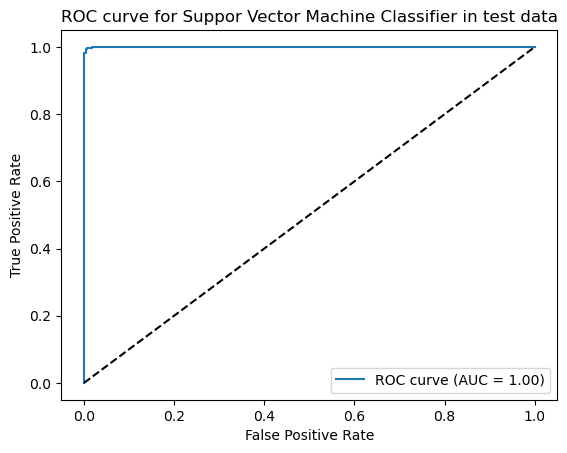

In [4410]:
y_pred_prob_SVC = model_SVC.predict_proba(X_test)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_SVC)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title("ROC curve for Suppor Vector Machine Classifier in test data")
plt.show()

### 3. k-Nearest Neighbors

Next we study the k-Nearest Neighbors classifier. We obtain the accuracy 99.3% in test data and the AUC value in test data is 1.00.

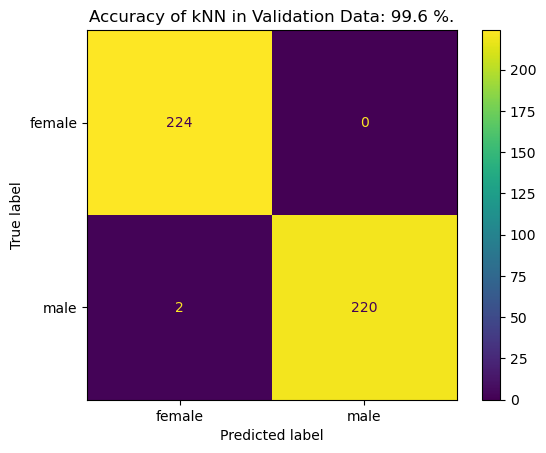

In [4413]:
from sklearn.neighbors import KNeighborsClassifier

# By trying we find out that for example n_neighbors = 4 and = 8 give the best accuracy 99.3% in test data
model_knn = KNeighborsClassifier(n_neighbors = 4) 
model_knn.fit(X_train, y_train)

acc_knn_valid = model_knn.score(X_valid, y_valid)

y_pred_knn_valid = model_knn.predict(X_valid)
cm_knn_valid = confusion_matrix(y_valid, y_pred_knn_valid)
ConfusionMatrixDisplay(confusion_matrix=cm_knn_valid, display_labels = gender_LE.inverse_transform([0, 1])).plot()
plt.title(f'Accuracy of kNN in Validation Data: {round(acc_knn_valid*100, 1)} %.')
plt.show()


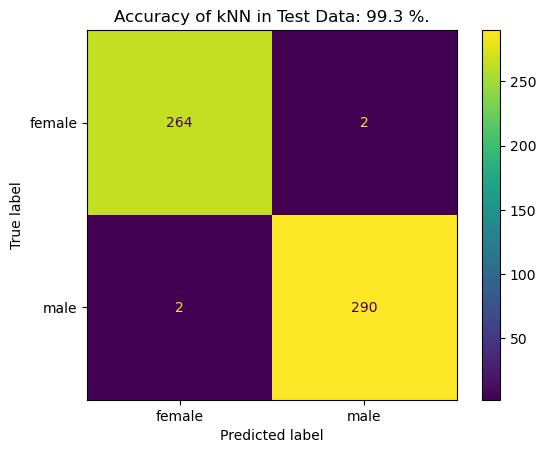

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       266
           1       0.99      0.99      0.99       292

    accuracy                           0.99       558
   macro avg       0.99      0.99      0.99       558
weighted avg       0.99      0.99      0.99       558



In [4414]:
acc_knn_test = model_knn.score(X_test, y_test)

y_pred_knn_test = model_knn.predict(X_test)
cm_knn_test = confusion_matrix(y_test, y_pred_knn_test)
ConfusionMatrixDisplay(confusion_matrix=cm_knn_test, display_labels = gender_LE.inverse_transform([0, 1])).plot()
plt.title(f'Accuracy of kNN in Test Data: {round(acc_knn_test*100, 1)} %.')
plt.show()

cr_knn = classification_report(y_test, y_pred_knn_test)
print(cr_knn)

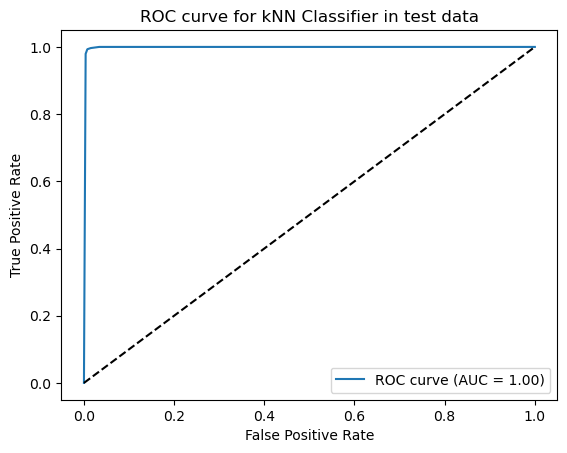

In [4415]:
y_pred_prob_knn = model_knn.predict_proba(X_test)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_knn)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title("ROC curve for kNN Classifier in test data")
plt.show()

### 4. Naive Bayes

Then we study the Naive Bayes classifier. We obtain the accuracy 97.7% in test data and the AUC value in test data is 1.00.

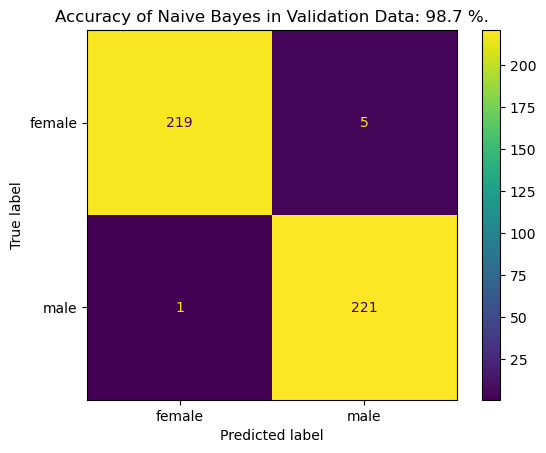

In [4418]:
from sklearn.naive_bayes import GaussianNB

model_naivebayes = GaussianNB()
model_naivebayes.fit(X_train, y_train)

acc_naivebayes_valid = model_naivebayes.score(X_valid, y_valid)

y_pred_naivebayes_valid = model_naivebayes.predict(X_valid)
cm_naivebayes_valid = confusion_matrix(y_valid, y_pred_naivebayes_valid)
ConfusionMatrixDisplay(confusion_matrix=cm_naivebayes_valid, display_labels = gender_LE.inverse_transform([0, 1])).plot()
plt.title(f'Accuracy of Naive Bayes in Validation Data: {round(acc_naivebayes_valid*100, 1)} %.')
plt.show()

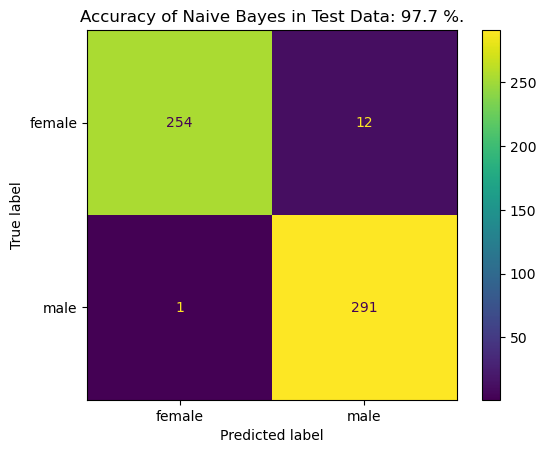

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       266
           1       0.96      1.00      0.98       292

    accuracy                           0.98       558
   macro avg       0.98      0.98      0.98       558
weighted avg       0.98      0.98      0.98       558



In [4419]:
acc_naivebayes_test = model_naivebayes.score(X_test, y_test)

y_pred_naivebayes_test = model_naivebayes.predict(X_test)
cm_naivebayes_test = confusion_matrix(y_test, y_pred_naivebayes_test)
ConfusionMatrixDisplay(confusion_matrix=cm_naivebayes_test, display_labels = gender_LE.inverse_transform([0, 1])).plot()
plt.title(f'Accuracy of Naive Bayes in Test Data: {round(acc_naivebayes_test*100, 1)} %.')
plt.show()

cr_naivebayes = classification_report(y_test, y_pred_naivebayes_test)
print(cr_naivebayes)

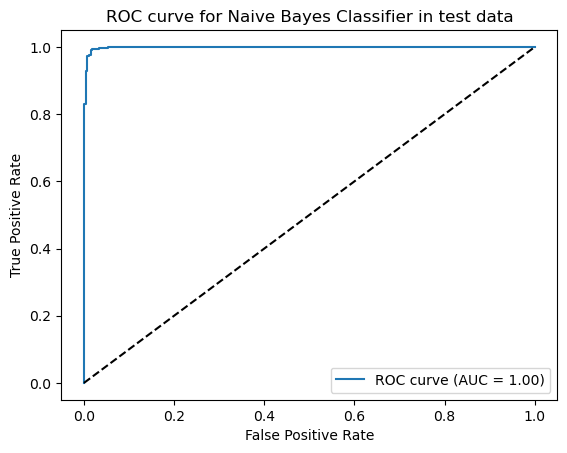

In [4420]:
y_pred_prob_naivebayes = model_naivebayes.predict_proba(X_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_naivebayes)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title("ROC curve for Naive Bayes Classifier in test data")
plt.show()

### 5. Random Forest

Next we look at the Random Forest classifier. We note that we chose the four input features meanfun, IQR, sfm and minfun (from which we finally dropped minfun) based on the feature importances of the random forest (and decision tree) when applied to the whole dataset. However, this is not documented in this project.

We see that in the case of the random forest the most important features (equally important) are meanfun and IQR. We obtain the accuracy 98.9% in test data and the AUC value in test data is 1.00.

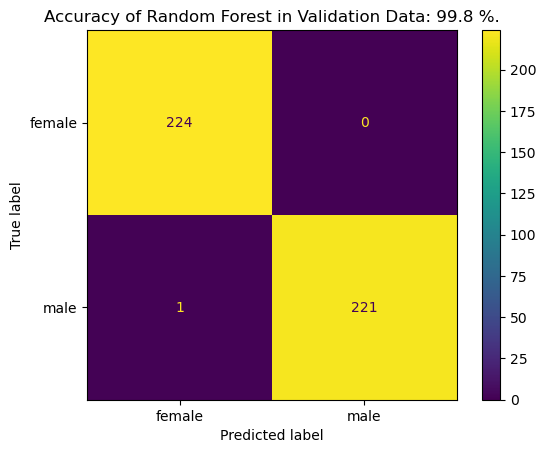

,Feature importance
IQR,44.7 %
meanfun,44.3 %
sfm,11.0 %


In [4423]:
from sklearn.ensemble import RandomForestClassifier

# By trying we find out that the accuracy in validation and test data reach 99.1% and 98.9% quite early
model_RF = RandomForestClassifier(n_estimators=100, random_state=42, max_depth =10) # 100 & 10
model_RF.fit(X_train, y_train)

acc_RF_valid = model_RF.score(X_valid, y_valid)

y_pred_RF_valid = model_RF.predict(X_valid)
cm_RF_valid = confusion_matrix(y_valid, y_pred_RF_valid)
ConfusionMatrixDisplay(confusion_matrix=cm_RF_valid, display_labels = gender_LE.inverse_transform([0, 1])).plot()
plt.title(f'Accuracy of Random Forest in Validation Data: {round(acc_RF_valid*100, 1)} %.')
plt.show()

# Let's print the feature importances
importances = model_RF.feature_importances_
feature_importances = pd.DataFrame(columns = ["Feature importance"], index = columns) 
for i in range(len(columns)):
    feature_importances.loc[columns[i], "Feature importance"] = round(importances[i]*100, 1)
feature_importances = feature_importances.sort_values(by="Feature importance", ascending=False)

feature_importances["Feature importance"] = feature_importances["Feature importance"].apply(lambda x: f"{x} %")

feature_importances


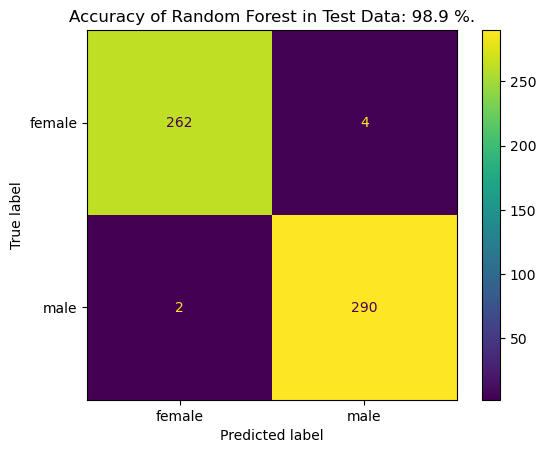

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       266
           1       0.99      0.99      0.99       292

    accuracy                           0.99       558
   macro avg       0.99      0.99      0.99       558
weighted avg       0.99      0.99      0.99       558



In [4424]:
acc_RF_test = model_RF.score(X_test, y_test)

y_pred_RF_test = model_RF.predict(X_test)
cm_RF_test = confusion_matrix(y_test, y_pred_RF_test)
ConfusionMatrixDisplay(confusion_matrix=cm_RF_test, display_labels = gender_LE.inverse_transform([0, 1])).plot()
plt.title(f'Accuracy of Random Forest in Test Data: {round(acc_RF_test*100, 1)} %.')
plt.show()

cr_RF = classification_report(y_test, y_pred_RF_test)
print(cr_RF)

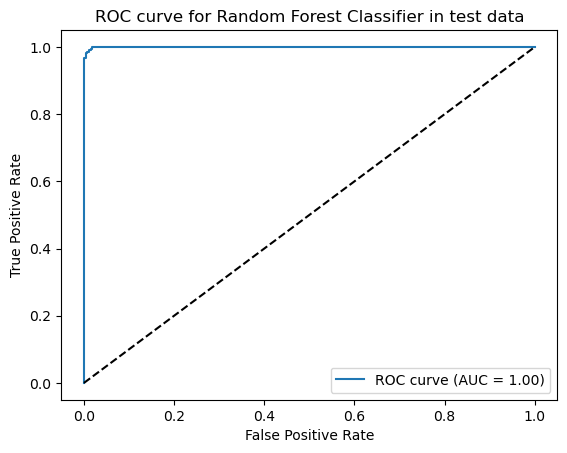

In [4425]:
y_pred_prob_RF = model_RF.predict_proba(X_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_RF)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title("ROC curve for Random Forest Classifier in test data")
plt.show()

### 6. Logistic Regression

Then we study the Logistic Regression classifier. We obtain the accuracy 99.1% in test data and the AUC value in test data is 1.00.

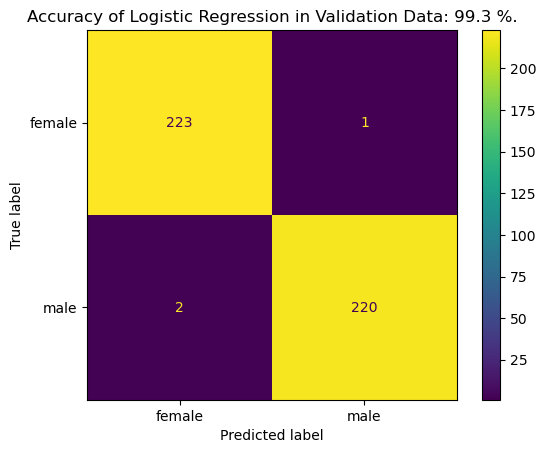

In [4428]:
from sklearn.linear_model import LogisticRegression

model_logreg = LogisticRegression(random_state=42)
model_logreg.fit(X_train, y_train)

acc_logreg_valid = model_logreg.score(X_valid, y_valid)

y_pred_logreg_valid = model_logreg.predict(X_valid)
cm_logreg_valid = confusion_matrix(y_valid, y_pred_logreg_valid)
ConfusionMatrixDisplay(confusion_matrix=cm_logreg_valid, display_labels = gender_LE.inverse_transform([0, 1])).plot()
plt.title(f'Accuracy of Logistic Regression in Validation Data: {round(acc_logreg_valid*100, 1)} %.')
plt.show()


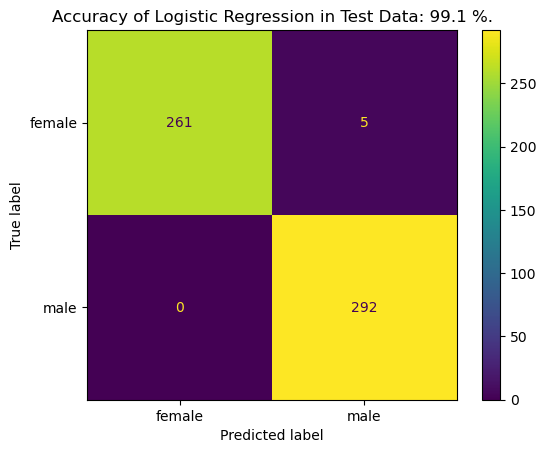

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       266
           1       0.98      1.00      0.99       292

    accuracy                           0.99       558
   macro avg       0.99      0.99      0.99       558
weighted avg       0.99      0.99      0.99       558



In [4429]:
acc_logreg_test = model_logreg.score(X_test, y_test)

y_pred_logreg_test = model_logreg.predict(X_test)
cm_logreg_test = confusion_matrix(y_test, y_pred_logreg_test)
ConfusionMatrixDisplay(confusion_matrix=cm_logreg_test, display_labels = gender_LE.inverse_transform([0, 1])).plot()
plt.title(f'Accuracy of Logistic Regression in Test Data: {round(acc_logreg_test*100, 1)} %.')
plt.show()

cr_logreg = classification_report(y_test, y_pred_logreg_test)
print(cr_logreg)

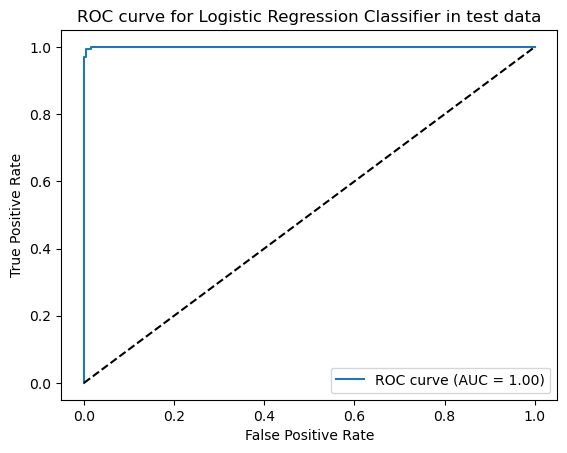

In [4430]:
y_pred_prob_logreg = model_logreg.predict_proba(X_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_logreg)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title("ROC curve for Logistic Regression Classifier in test data")
plt.show()

### 7. Neural Network

Finally, we look at the Neural Network classifier. We build a simple feed-forward neural network which contains 4 hidden layers and rather low amount of neurons (7, 10, 10, 7). 

After training the neural network 300 epochs we obtain the accuracy 99.3% in test data and the AUC value in test data is 1.00. We note that the accuracy varies roughly between 98.5%-99.5% in different runs.

In [4433]:
import tensorflow as tf

model_NN = tf.keras.Sequential([ 
    tf.keras.layers.Dense(7, activation = "relu",), 
    tf.keras.layers.Dense(10, activation = "tanh"), 
    tf.keras.layers.Dense(10, activation = "relu"), 
    tf.keras.layers.Dense(7, activation = "relu"),
    tf.keras.layers.Dense(2, activation = "softmax") 
])


In [4434]:
model_NN.compile(loss='sparse_categorical_crossentropy',
              optimizer= "adam",
              metrics=['accuracy']
              )
model_NN.fit(X_train, y_train, verbose=1, epochs=300, batch_size = 50)

results_valid = model_NN.evaluate(X_valid, y_valid, verbose = 1) 
results_test = model_NN.evaluate(X_test, y_test, verbose = 1) 

Epoch 1/300
36/36 [==============================] - 0s 449us/step - loss: 0.5462 - accuracy: 0.8122
Epoch 2/300
36/36 [==============================] - 0s 456us/step - loss: 0.3794 - accuracy: 0.9462
Epoch 3/300
36/36 [==============================] - 0s 396us/step - loss: 0.2302 - accuracy: 0.9624
Epoch 4/300
36/36 [==============================] - 0s 357us/step - loss: 0.1326 - accuracy: 0.9720
Epoch 5/300
36/36 [==============================] - 0s 359us/step - loss: 0.0826 - accuracy: 0.9826
Epoch 6/300
36/36 [==============================] - 0s 350us/step - loss: 0.0564 - accuracy: 0.9871
Epoch 7/300
36/36 [==============================] - 0s 315us/step - loss: 0.0434 - accuracy: 0.9882
Epoch 8/300
36/36 [==============================] - 0s 353us/step - loss: 0.0380 - accuracy: 0.9888
Epoch 9/300
36/36 [==============================] - 0s 351us/step - loss: 0.0355 - accuracy: 0.9888
Epoch 10/300
36/36 [==============================] - 0s 334us/step - loss: 0.0338 - accura

14/14 [==============================] - 0s 328us/step


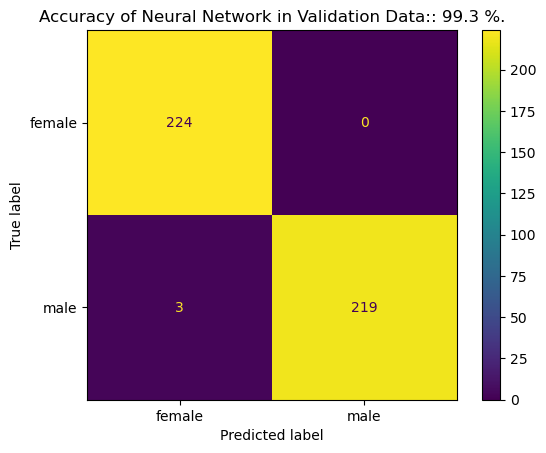

In [4435]:
import numpy as np

y_pred_NN_valid = np.argmax(model_NN.predict(X_valid),  axis = 1)  

cm_NN_valid = confusion_matrix(y_valid, y_pred_NN_valid)

ConfusionMatrixDisplay(confusion_matrix=cm_NN_valid, display_labels= gender_LE.inverse_transform([0, 1])).plot()
plt.title(f'Accuracy of Neural Network in Validation Data:: {round(results_valid[1]*100, 1)} %.')
plt.show() 

18/18 [==============================] - 0s 322us/step


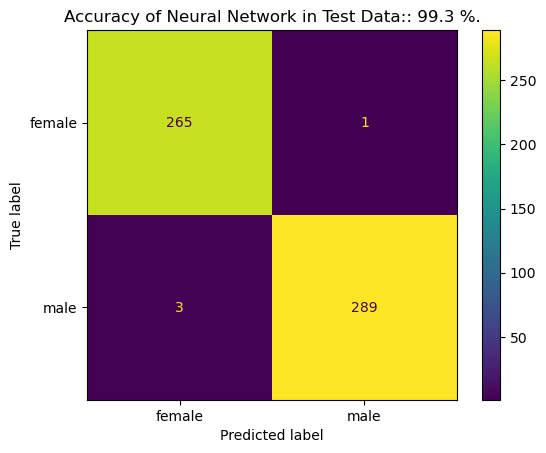

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       266
           1       1.00      0.99      0.99       292

    accuracy                           0.99       558
   macro avg       0.99      0.99      0.99       558
weighted avg       0.99      0.99      0.99       558



In [4436]:
# Around 99 % is the best we can get using this neural network

y_pred_NN_test = np.argmax(model_NN.predict(X_test),  axis = 1) 

cm_NN_test = confusion_matrix(y_test, y_pred_NN_test)

ConfusionMatrixDisplay(confusion_matrix=cm_NN_test, display_labels= gender_LE.inverse_transform([0, 1])).plot()
plt.title(f'Accuracy of Neural Network in Test Data:: {round(results_test[1]*100, 1)} %.')
plt.show() 
cr_NN = classification_report(y_test, y_pred_NN_test)
print(cr_NN)

18/18 [==============================] - 0s 309us/step


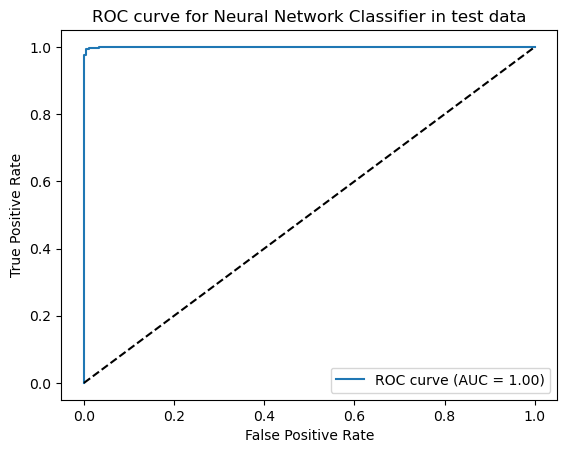

In [4437]:
y_pred_prob_NN = model_NN.predict(X_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_NN)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title("ROC curve for Neural Network Classifier in test data")
plt.show()

## Analysis of the results and comparison of the models

Let's first summarize the results of our different machine learning algorithms (accuracies and AUC values in test data):

1. **Decision Tree**: Accuracy 98.6% and AUC value 0.99
2. **Support Vector Machine**: Accuracy 99.1% and AUC value 1.00   
3. **k-Nearest Neighbors**: Accuracy 99.3% and AUC value 1.00
4. **Gaussian Naive Bayes**: Accuracy 97.7% AUC value 1.00 
5. **Random Forest**: Accuracy 98.9% and AUC value 1.00
6. **Logistic Regression**: Accuracy 99.1% and AUC value 1.00
7. **Neural Networks**: Accuracy 99.3% and AUC value 1.00.

Here we can see that all the models are performing exceptionally well in the test data (accuracy in the range 97.7%-99.3% and AUC values in the range 0.99-1.00). Gaussian Naive Bayes classifier has the lowest accuracy which is still astonishing 97.7%. The best performing models are k-Nearest Neighbors and Neural Networks with extraordinary 99.3% accuracy. 

The AUC value (Area Under (the ROC) Curve) is 0.99 for the Decision Tree and 1.00 for the rest of the classifiers making them practically perfect predictive models in this processed dataset. This means that all the models can almost perfectly distinguish the male and female voices given a random sample of our (processed) dataset.

The word **processed dataset** is the key factor here explaining the almost unordinary accuracy and performance of the models. We indeed dropped the outliers separately from female and male subsets of the dataset. There were a lot more female outliers compared to male outliers ("masculine female voices" vs. "feminine male voices"). We first dropped the outliers from the whole dataset (treating men and women as one group) and this lead to accuracies of the models ranging between 95%-98%. So separate outlier detection increased the accuracy roughly 1-2 percentage points. 

We also investigated a little bit how the amount of input features affected the accuracies. We tried for example the following version of the input features: ["meanfun", "IQR", "sfm", "minfun"], ["meanfun", "IQR", "sfm"], ["meanfun", "IQR"] and ["meanfun"]. The accuracies of the models were 92%-96% for ["meanfun"], about 96% for ["meanfun", "IQR"] and 95-98% for the rest input features (in all cases we treated men and women as one group, i.e. without separate outlier detection). The best individual accuracies were obtained for the triplet ["meanfun", "IQR", "sfm"]. 

As we have mentioned many times in this project, we first used the entire dataset in the training of a decision tree and random forest. Then we were able to obtain the most important features in the classification tasks of the tree models. Using this approach we ended up with the features ["meanfun", "IQR", "sfm", "minfun"]. However, after more careful study and plotting histograms and scatter plots (see section Visualization) we deduced that minfun is not a useful feature since it overlaps too much for female and male voices (and hence gives worse accuracy). Therefore, in the end, we chose the "canonical triplet" ["meanfun", "IQR", "sfm"] as our input features to determine the gender label in the classification task. 

When we look at the results (especially the feature importances) of our tree models we see that meanfun and IQR are the dominant features in the classification, sfm having much less impact. But including sfm does increase the accuracies compared to only having meanfun and IQR as input features.

We also note that the data we downloaded from Kaggle was already in a "processed" form and can perhaps explain at least part of the extraordinary accuracies of our models. In other words, our data was not "raw voice data" and the preprocessing was already partly done in the loaded dataset. However, our main goal was to test different machine learning models in a simple classification task and this was successful in our opinion, even though the results might seem "too good to be true".


